# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

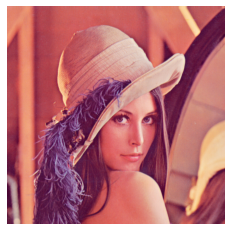

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = './D00_lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)[...,[2, 1, 0]]
plt.imshow(img)
plt.axis('off')
plt.show()

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

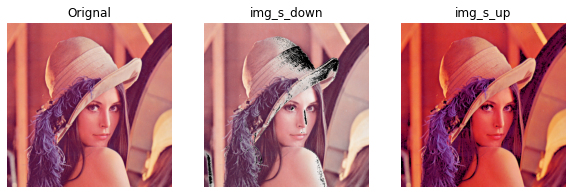

In [25]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1, title = 'Orignal')
plt.imshow(img)
plt.axis('off')

# 在 HSV color space 增減飽和度
for i,x in enumerate(['img_s_down','img_s_up']):
    arr = globals()[x] = None
    arr = img_hsv.astype('float32')
    arr[..., 1] = arr[..., 1] + (2*i-1)*change_percentage*255
    
    # 針對飽和度的值做改變，超過界線 0~1 的都會 bound
    arr[(arr[..., 1] < 0) | (arr[..., 1] > 255)] = 0

    # 轉換 color space 回 BGR
    arr = cv2.cvtColor(arr.astype('uint8'), cv2.COLOR_HSV2BGR)
    
    # 組合圖片 + 顯示圖片
    plt.subplot(1, 3, i+2, title = x)
    plt.imshow(arr)
    plt.axis('off')
plt.show()

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

In [ ]:
# case 1
# 每個 channel 個別做直方圖均衡
equalHist_by_channel = 

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = 

# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = 

# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))
while True:
    # 比較 (原圖, BGR color space 對每個 channel 做直方圖均衡, HSV color space 對明度做直方圖均衡)
    cv2.imshow('bgr equal histogram', img_bgr_equalHist)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## 調整對比 / 明亮

In [ ]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = 
add_lighness = 

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
while True:
    # 比較不同程度的對比 / 明亮
    cv2.imshow('adjust contrast and brighness', img_contrast_light)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break